<a href="https://colab.research.google.com/github/Sayed-Hossein-Hosseini/Saving_Titanic_Passengers_From_Disaster/blob/master/Saving_Titanic_Passengers_From_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Saving Titanic Passengers From Disaster**

## **Libraries**

In [1]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

## **Data Loading**

In [2]:
# --- Settings ---
# Path to the training data Excel file
file_path_train = '/content/Titanic/train.csv'
# Path to the test data Excel file
file_path_test = '/content/Titanic/test.csv'

# If the data is not in the first sheet, specify the sheet name
# sheet_name_train = 'Sheet1' # Example
# sheet_name_test = 'Sheet1'  # Example
# --- End of Settings ---

# Initialize DataFrames to None to check if they were successfully loaded later
df_train = None
df_test = None

try:
    # Read the training data file (usually reads the first sheet by default)
    # If a different sheet is needed, use the sheet_name parameter:
    # df_train = pd.read_excel(file_path_train, sheet_name=sheet_name_train)
    df_train = pd.read_csv(file_path_train)
    print(f"Training DataFrame successfully read from file '{file_path_train}'.")
    print("First few rows of the training DataFrame:")
    print(df_train.head())
    print("-" * 30)

except FileNotFoundError:
    print(f"Error: Training file '{file_path_train}' not found. Please check the file path.")
except Exception as e:
    print(f"Error reading the training file: {e}")


try:
    # Read the test data file (usually reads the first sheet by default)
    # If a different sheet is needed, use the sheet_name parameter:
    # df_test = pd.read_excel(file_path_test, sheet_name=sheet_name_test)
    df_test = pd.read_csv(file_path_test)
    print(f"Test DataFrame successfully read from file '{file_path_test}'.")
    print("First few rows of the test DataFrame:")
    print(df_test.head())
    print("-" * 30)

    # Now you can work with df_train and df_test (if both were read successfully)
    # Example: Check if both DataFrames were loaded
    if df_train is not None and df_test is not None:
        print("Both training and test DataFrames loaded successfully.")
        # Add your data processing steps here...
    else:
        print("One or both DataFrames failed to load. Check previous error messages.")


except FileNotFoundError:
    print(f"Error: Test file '{file_path_test}' not found. Please check the file path.")
except Exception as e:
    print(f"Error reading the test file: {e}")

Training DataFrame successfully read from file '/content/Titanic/train.csv'.
First few rows of the training DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN 

## **Data Description**

In [3]:
# ==================================================
# Assume df_train and df_test are already loaded
# ==================================================
# Example (remove or comment out this section in your final code,
# as it assumes the DataFrames already exist):
# data_train = {'col_num1': [1, 2, 3, 4, 5],
#               'col_cat1': ['A', 'B', 'A', 'C', 'B'],
#               'col_num2': [10.1, 11.2, np.nan, 13.4, 14.5],
#               'col_mixed': [1, 'X', 3, 'Y', 5]}
# df_train = pd.DataFrame(data_train)

# data_test = {'col_num1': [6, 7, 8],
#              'col_cat1': ['C', 'A', 'C'],
#              'col_num2': [15.6, 16.7, 17.8],
#              'col_mixed': ['Z', 8, 9]}
# df_test = pd.DataFrame(data_test)
# --- End of Example Section ---


# Helper function to print DataFrame information
def describe_dataframe(df, df_name):
    """
    Prints descriptive and general information about a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to describe.
        df_name (str): The name of the DataFrame for display purposes (e.g., 'Training' or 'Test').
    """
    print("\n" + "="*60)
    print(f"          {df_name} Data Description")
    print("="*60)

    # First, check if the variable is actually a DataFrame or None
    if isinstance(df, pd.DataFrame):
        print(f"\n1. Shape (Rows, Columns) of {df_name} data:")
        print(df.shape)

        print(f"\n2. Basic Information for {df_name} data (Columns, Non-Null Counts, Dtypes):")
        # df.info() prints directly, so call it after the header
        # To capture output nicely in some environments, redirect to a string buffer
        buffer = io.StringIO()
        df.info(buf=buffer)
        info_str = buffer.getvalue()
        print(info_str)

        print(f"\n3. Numerical Features Summary Statistics for {df_name} data:")
        # Using round(2) for cleaner output
        try:
            # Select only numerical columns
            numeric_cols = df.select_dtypes(include=np.number)
            if not numeric_cols.empty:
                 print(numeric_cols.describe().round(2))
            else:
                 print("No numerical columns found.")
        except Exception as e:
            print(f"Could not generate numerical description: {e}")

        print(f"\n4. Categorical/Object Features Summary Statistics for {df_name} data:")
        try:
            # Select columns with 'object' dtype (usually strings or mixed types)
            object_cols = df.select_dtypes(include='object')
            if not object_cols.empty:
                print(object_cols.describe())
            else:
                print(f"No object/categorical columns found in the {df_name} data.")
        except Exception as e:
             print(f"Could not generate categorical description: {e}")

        print(f"\n5. Missing Values per Column in {df_name} data:")
        missing_values = df.isnull().sum()
        # Show only columns that actually have missing values
        missing_values = missing_values[missing_values > 0]
        if not missing_values.empty:
            print(missing_values)
        else:
            print(f"No missing values found in the {df_name} data.")

    # If the input was None or not a DataFrame
    elif df is None:
         print(f"'{df_name}' variable is None. Cannot display description.")
    else:
         print(f"'{df_name}' variable is not a pandas DataFrame. Type: {type(df)}. Cannot display description.")


# --- Check and Display Descriptive Information ---

# First, check if the variables df_train and df_test actually exist
# This prevents errors if, for example, one of the files failed to load in a previous step.
if 'df_train' in locals() or 'df_train' in globals():
    describe_dataframe(df_train, 'Training')
else:
    print("\nError: DataFrame 'df_train' does not exist in the current environment.")

if 'df_test' in locals() or 'df_test' in globals():
    describe_dataframe(df_test, 'Test')
else:
    print("\nError: DataFrame 'df_test' does not exist in the current environment.")


print("\n" + "="*60)
print("          End of Data Description")
print("="*60)


          Training Data Description

1. Shape (Rows, Columns) of Training data:
(891, 12)

2. Basic Information for Training data (Columns, Non-Null Counts, Dtypes):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3. Numerical Features Summary Statistics for Training data:
       Passenge

## **Data Visualizing**


      Visualizing Training Data (891 rows, 12 columns)

Identified Numerical Columns: ['PassengerId', 'Age', 'Fare']
Identified Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

--- Visualizing Numerical Columns (3) for Training ---

Generating Histograms and Density Plots...


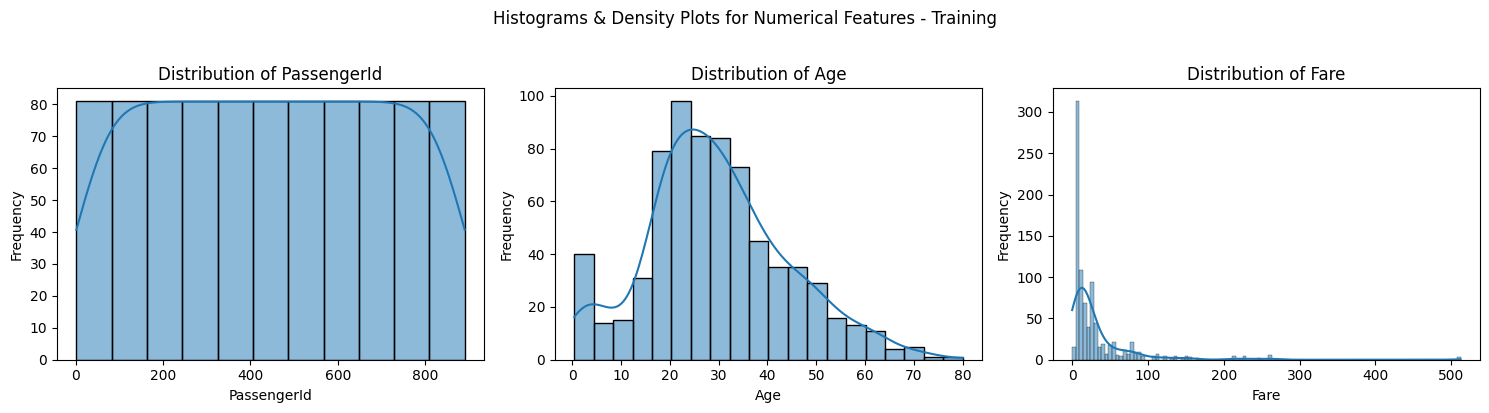


Generating Box Plots...


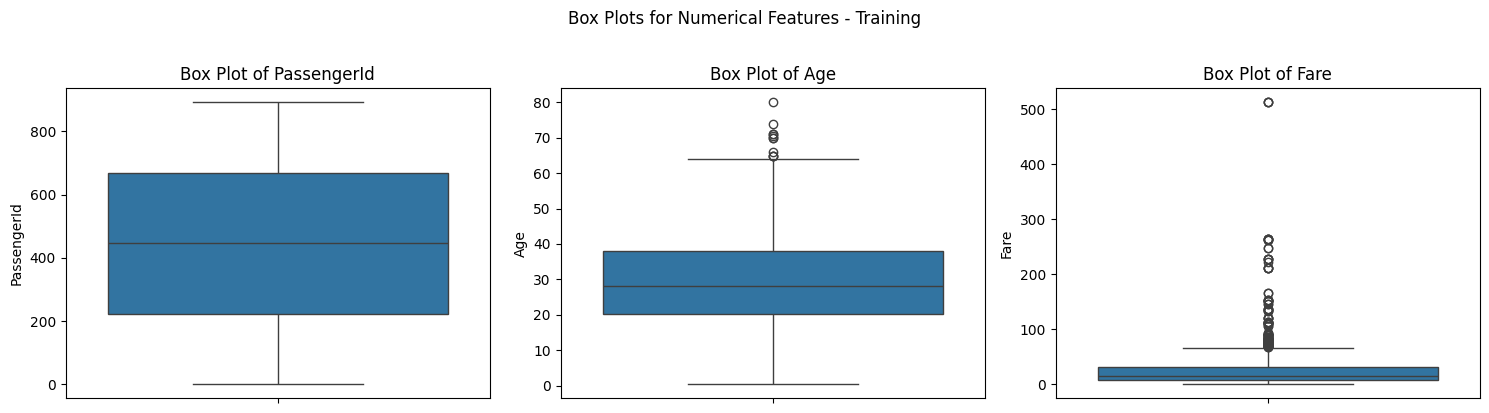


Generating Pair Plot...


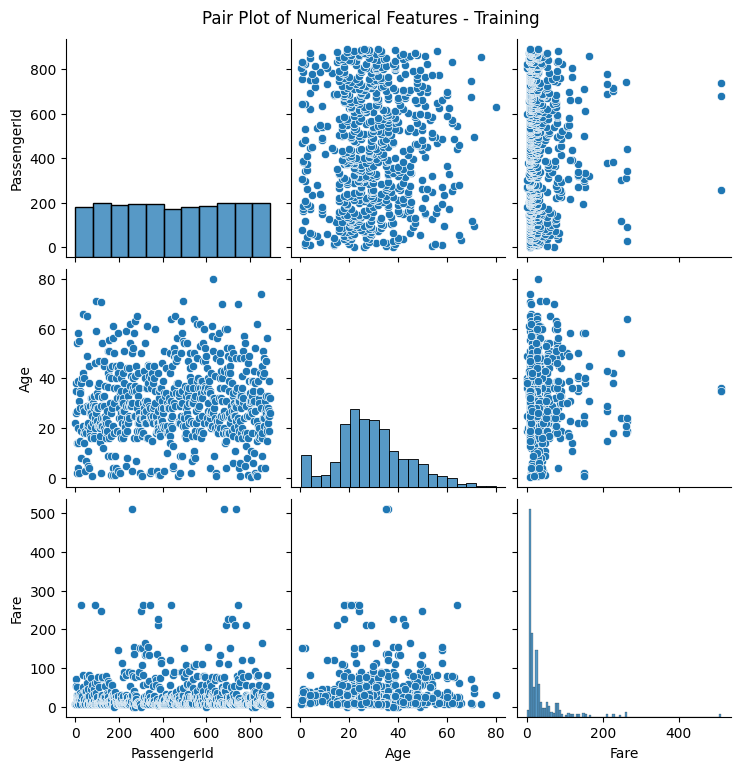


--- Visualizing Categorical Columns (9) for Training ---

Generating Count Plots...
  Skipping count plot for 'Name' (too many unique values: 891).
  Skipping count plot for 'Ticket' (too many unique values: 681).
  Skipping count plot for 'Cabin' (too many unique values: 147).


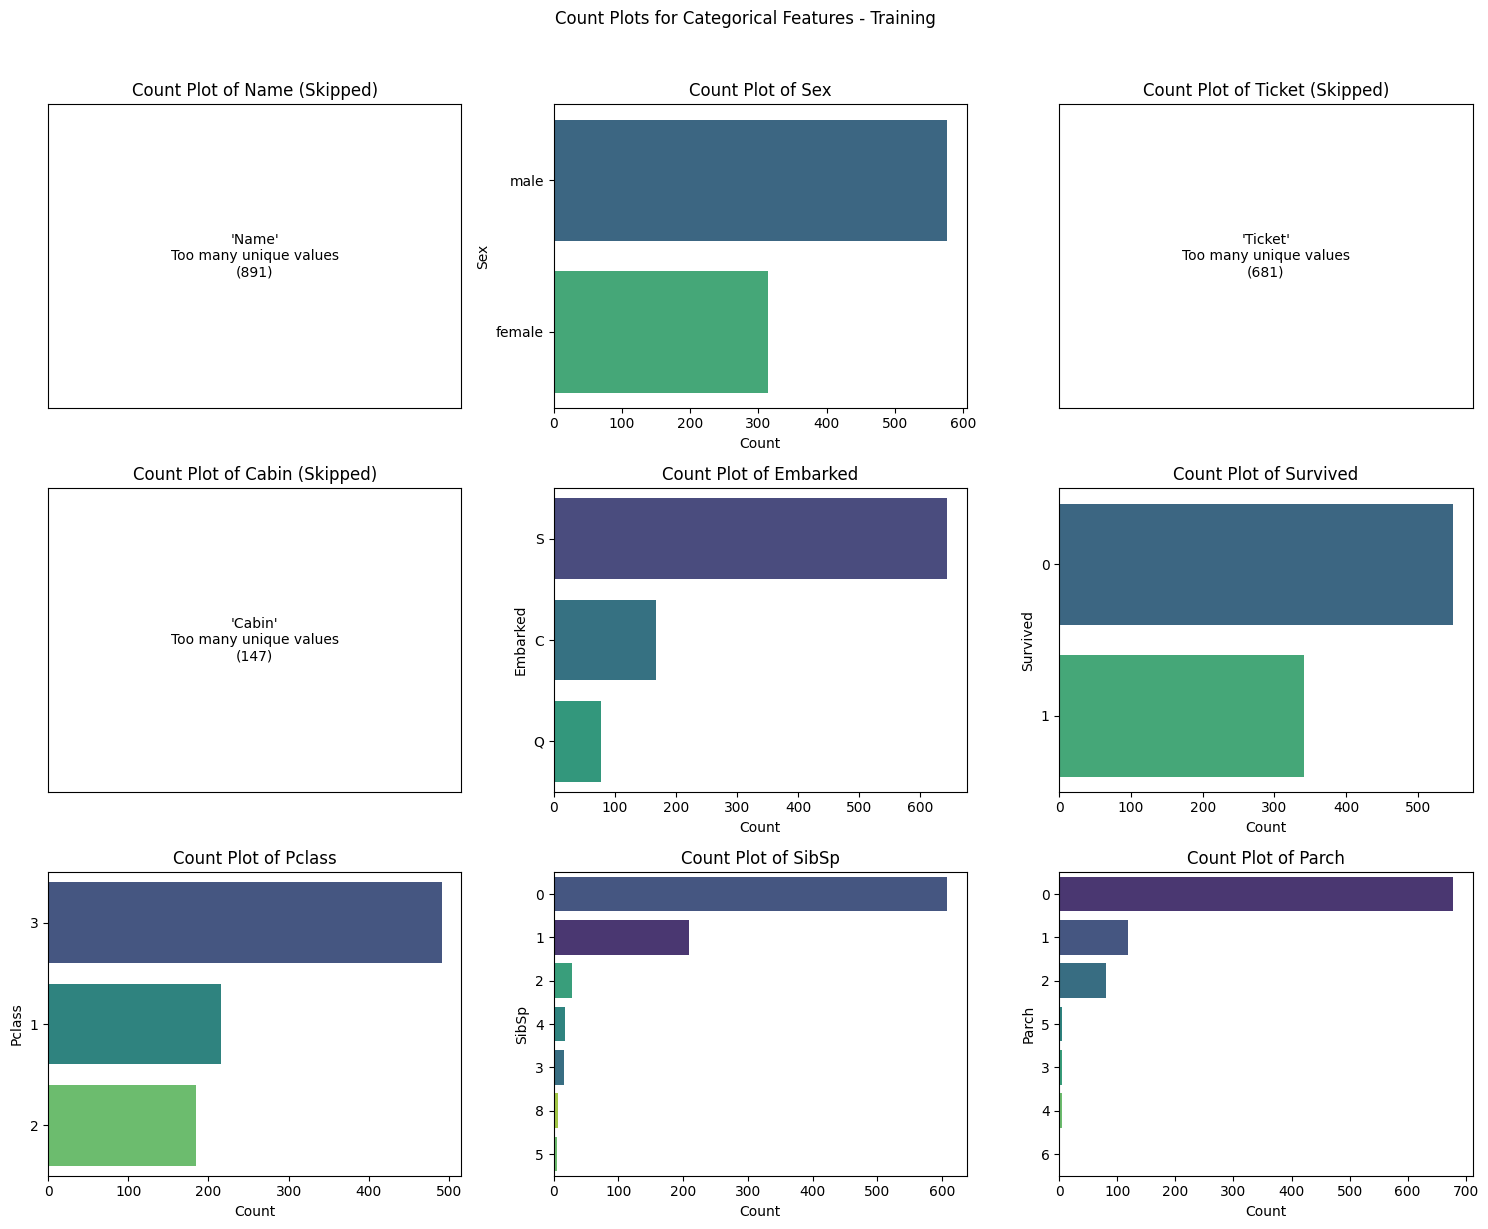


      Visualizing Test Data (418 rows, 11 columns)

Identified Numerical Columns: ['PassengerId', 'Age', 'Fare']
Identified Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass', 'SibSp', 'Parch']

--- Visualizing Numerical Columns (3) for Test ---

Generating Histograms and Density Plots...


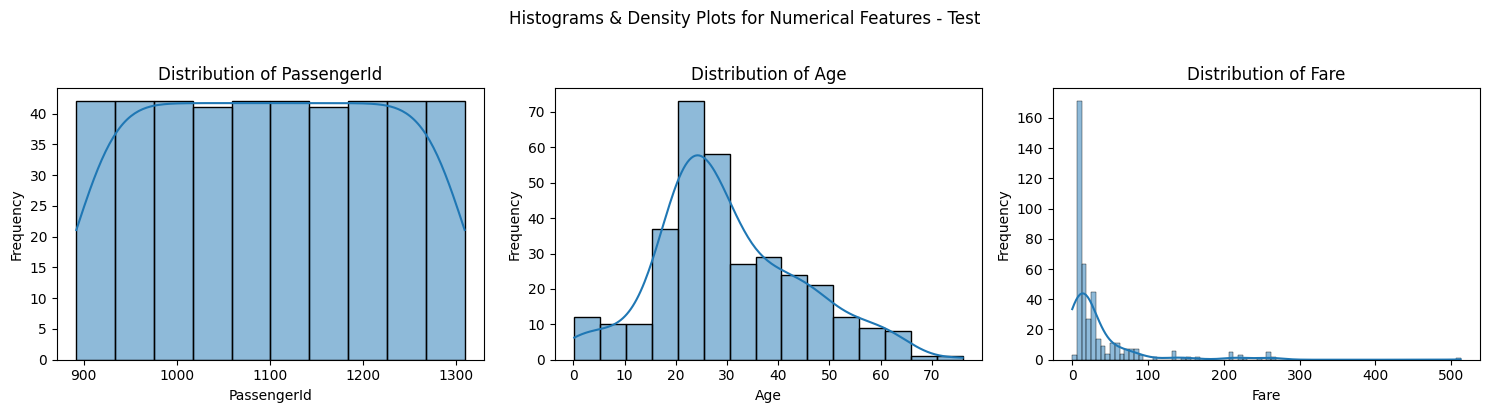


Generating Box Plots...


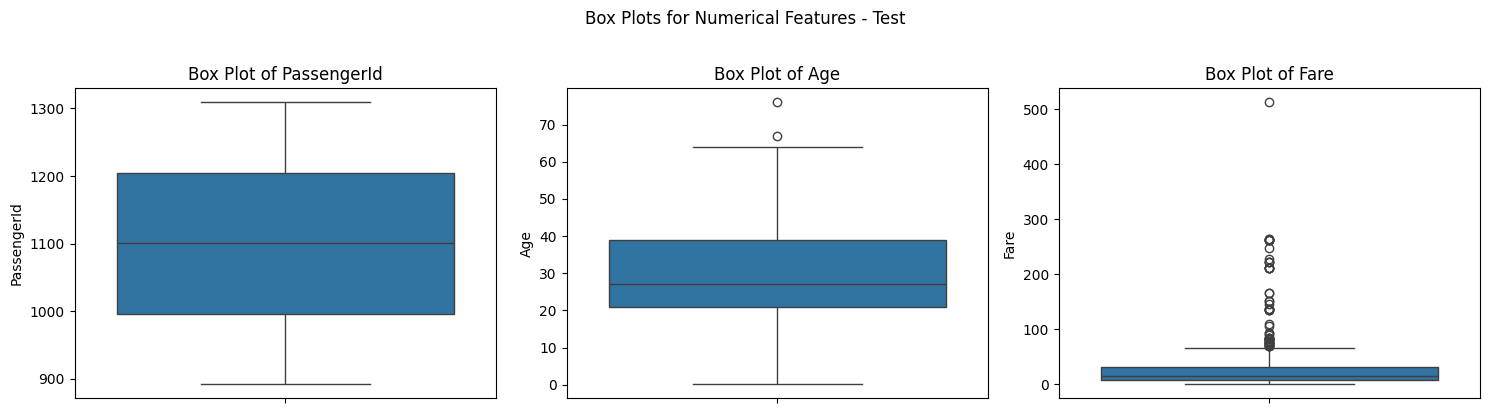


Generating Pair Plot...


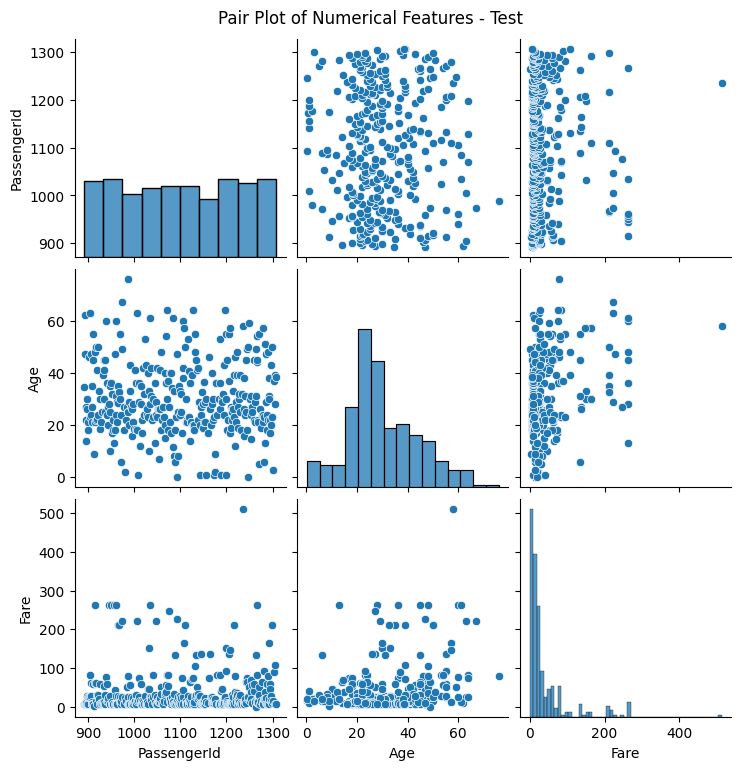


--- Visualizing Categorical Columns (8) for Test ---

Generating Count Plots...
  Skipping count plot for 'Name' (too many unique values: 418).
  Skipping count plot for 'Ticket' (too many unique values: 363).
  Skipping count plot for 'Cabin' (too many unique values: 76).


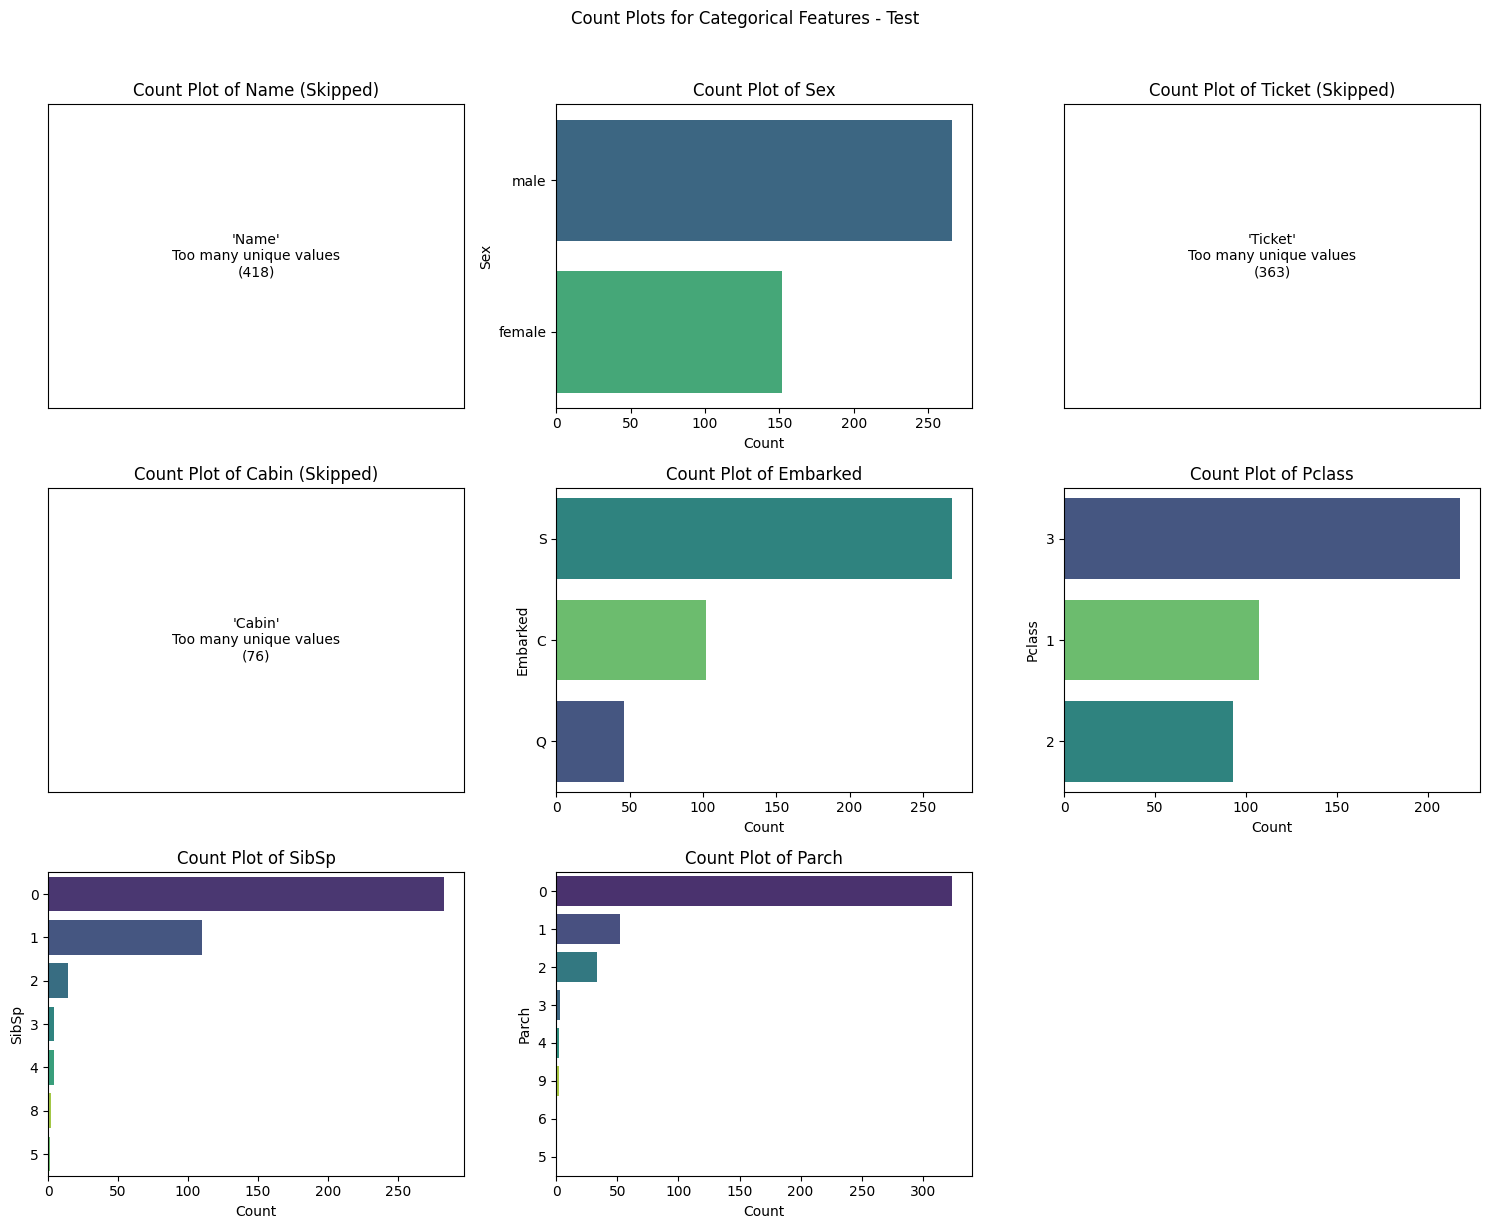


          End of Data Visualization


In [4]:
# ==================================================
# Define sample DataFrames based on the image descriptions (Titanic)
# ==================================================
# Sample data for training (df_train)
# data_train = {
#     'Survival': [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], # 0 = No, 1 = Yes
#     'Pclass': [3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1],   # Ticket class: 1, 2, 3
#     'Sex': ['male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'female'], # Sex: male, female
#     'Age': [22.0, 38.0, 26.0, 35.0, 35.0, np.nan, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0], # Age of passenger (continuous)
#     'SibSp': [1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0],    # Number of siblings / spouses aboard
#     'Parch': [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0],    # Number of parents / children aboard
#     'Ticket': ['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450', '330877', '17463', '349909', '347742', '237736', 'PP 9549', '110413'], # Ticket number (categorical)
#     'Cabin': [np.nan, 'C85', np.nan, 'C123', np.nan, np.nan, 'E46', np.nan, np.nan, np.nan, 'G6', 'C103'], # Cabin number (categorical with many missing values)
#     'Embarked': ['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S'] # Port of Embarkation (S, C, Q)
# }
# df_train = pd.DataFrame(data_train)

# # Sample data for testing (df_test) - usually does not include the 'Survival' column
# data_test = {
#     'Pclass': [3, 3, 2, 3, 1, 3, 2, 1],
#     'Sex': ['male', 'female', 'male', 'male', 'female', 'male', 'male', 'female'],
#     'Age': [34.5, 47.0, 62.0, 27.0, 22.0, 14.5, 21.0, np.nan], # Age of passenger (continuous) - added NaN
#     'SibSp': [0, 1, 0, 0, 1, 0, 1, 0],
#     'Parch': [0, 0, 0, 0, 1, 0, 0, 0],
#     'Ticket': ['330911', '363272', '240276', '315154', '113572', '330972', 'SC/PARIS 2167', 'PC 17758'],
#     'Cabin': [np.nan, np.nan, np.nan, np.nan, 'B42', np.nan, np.nan, 'C47'],
#     'Embarked': ['Q', 'S', 'Q', 'S', 'S', 'S', 'C', 'C']
# }
# df_test = pd.DataFrame(data_test)
# # --- End of Sample Data Section ---


# Helper function to visualize the DataFrame (with countplot fix)
def visualize_dataframe(df, df_name):
    """
    Generates distribution and scatter plots for numerical and categorical columns.
    """
    print("\n" + "="*60)
    print(f"      Visualizing {df_name} Data ({df.shape[0]} rows, {df.shape[1]} columns)")
    print("="*60)

    if not isinstance(df, pd.DataFrame) or df.empty:
        print(f"'{df_name}' is not a valid or non-empty DataFrame. Skipping visualization.")
        return

    # 1. Separate column types
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

    potential_cats_from_num = []
    if numerical_cols:
      for col in numerical_cols:
          unique_count = df[col].nunique()
          # Treat low-cardinality integers as potentially categorical
          if unique_count < 20 and pd.api.types.is_integer_dtype(df[col].dropna()):
              potential_cats_from_num.append(col)
              if col not in categorical_cols:
                  categorical_cols.append(col)

    numerical_cols = [col for col in numerical_cols if col not in potential_cats_from_num]

    print(f"\nIdentified Numerical Columns: {numerical_cols}")
    print(f"Identified Categorical Columns: {categorical_cols}")

    # --- 2. Visualize Numerical (Continuous) Columns ---
    if numerical_cols:
        print(f"\n--- Visualizing Numerical Columns ({len(numerical_cols)}) for {df_name} ---")

        # a) Histograms and Density Plots (KDE)
        print("\nGenerating Histograms and Density Plots...")
        num_plots = len(numerical_cols)
        ncols_grid = min(num_plots, 3)
        nrows_grid = int(np.ceil(num_plots / ncols_grid))

        plt.figure(figsize=(ncols_grid * 5, nrows_grid * 4))
        for i, col in enumerate(numerical_cols):
            plt.subplot(nrows_grid, ncols_grid, i + 1)
            try:
                sns.histplot(df[col].dropna(), kde=True)
                plt.title(f'Distribution of {col}')
                plt.xlabel(col)
                plt.ylabel('Frequency')
            except Exception as e:
                print(f"  Could not plot histogram for {col}: {e}")
        plt.suptitle(f'Histograms & Density Plots for Numerical Features - {df_name}', y=1.02)
        plt.tight_layout(rect=[0, 0, 1, 1])
        plt.show()

        # b) Box Plots
        print("\nGenerating Box Plots...")
        plt.figure(figsize=(ncols_grid * 5, nrows_grid * 4))
        for i, col in enumerate(numerical_cols):
            plt.subplot(nrows_grid, ncols_grid, i + 1)
            try:
                sns.boxplot(y=df[col].dropna())
                plt.title(f'Box Plot of {col}')
                plt.ylabel(col)
            except Exception as e:
                print(f"  Could not plot boxplot for {col}: {e}")
        plt.suptitle(f'Box Plots for Numerical Features - {df_name}', y=1.02)
        plt.tight_layout(rect=[0, 0, 1, 1])
        plt.show()

        # c) Pair Plot (for bivariate relationships)
        if len(numerical_cols) > 1 and len(numerical_cols) <= 7: # Adjustable threshold
            print("\nGenerating Pair Plot...")
            try:
                sns.pairplot(df[numerical_cols].dropna())
                plt.suptitle(f'Pair Plot of Numerical Features - {df_name}', y=1.02)
                plt.show()
            except Exception as e:
                print(f"  Could not generate pairplot: {e}")
        elif len(numerical_cols) > 7:
            print("\nSkipping Pair Plot (too many numerical features).")

    else:
        print(f"\n--- No continuous numerical columns identified to visualize for {df_name} ---")


    # --- 3. Visualize Categorical/Object (Discrete) Columns ---
    if categorical_cols:
        print(f"\n--- Visualizing Categorical Columns ({len(categorical_cols)}) for {df_name} ---")
        print("\nGenerating Count Plots...")
        num_plots = len(categorical_cols)
        ncols_grid = min(num_plots, 3)
        nrows_grid = int(np.ceil(num_plots / ncols_grid))

        plt.figure(figsize=(ncols_grid * 5, nrows_grid * 4))
        for i, col in enumerate(categorical_cols):
             unique_count = df[col].nunique()
             if unique_count > 50: # Adjustable threshold
                 print(f"  Skipping count plot for '{col}' (too many unique values: {unique_count}).")
                 ax = plt.subplot(nrows_grid, ncols_grid, i + 1)
                 ax.text(0.5, 0.5, f"'{col}'\nToo many unique values\n({unique_count})",
                         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
                         fontsize=10, wrap=True)
                 ax.set_xticks([])
                 ax.set_yticks([])
                 plt.title(f'Count Plot of {col} (Skipped)')
                 continue

             plt.subplot(nrows_grid, ncols_grid, i + 1)
             try:
                 order = df[col].value_counts().index
                 # **** Modified line to address FutureWarning ****
                 sns.countplot(y=df[col].astype(str),       # Variable on y-axis
                               hue=df[col].astype(str),     # Same variable for hue (coloring)
                               order=order.astype(str),   # Order of bars
                               palette='viridis',         # Color palette
                               legend=False)              # Disable the legend
                 # **** End of modification ****
                 plt.title(f'Count Plot of {col}')
                 plt.xlabel('Count')
                 plt.ylabel(col)
             except Exception as e:
                  print(f"  Could not plot countplot for {col}: {e}")
        plt.suptitle(f'Count Plots for Categorical Features - {df_name}', y=1.02)
        plt.tight_layout(rect=[0, 0, 1, 1])
        plt.show()

    else:
        print(f"\n--- No categorical columns found to visualize for {df_name} ---")

# --- Run Visualization ---
if 'df_train' in locals() or 'df_train' in globals():
    visualize_dataframe(df_train, 'Training')
else:
    print("\nError: DataFrame 'df_train' does not exist.")

if 'df_test' in locals() or 'df_test' in globals():
    visualize_dataframe(df_test, 'Test')
else:
    print("\nError: DataFrame 'df_test' does not exist.")

print("\n" + "="*60)
print("          End of Data Visualization")
print("="*60)

## **Correlation Analysis**

--- Starting feature selection and low-impact column removal process ---

--- Numerical Feature Correlation Analysis ---
Numerical columns for analysis (from train): ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


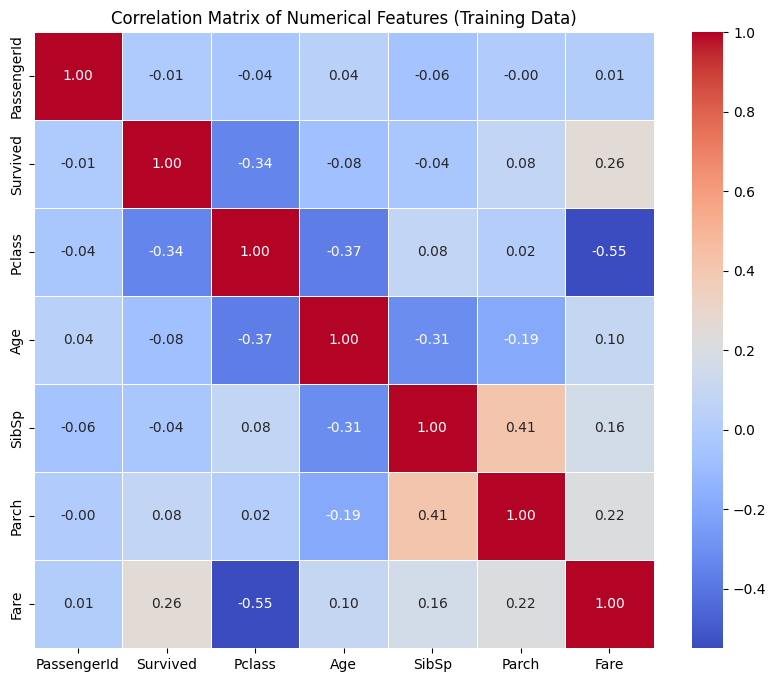


Correlation Matrix Values (Training Data):
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  

Absolute Correlation of numerical columns with 'Survived' (from train, sorted):
Pclass         0.338481
Fare           0.257307
Parch     

In [5]:
# ==================================================
# Assume df_train and df_test are already loaded
# ==================================================
# (Sample data section removed, assuming you have your actual
#  dataframe with the 'Survived' column loaded)
# df_train = ... (your actual training data)
# df_test = ... (your actual test data)


# --- Settings ---
# *** Key correction here ***
TARGET_COL = 'Survived' # Changed the column name to 'Survived'
# Threshold for removing numerical features with low correlation to the target
CORR_THRESHOLD_LOW_WITH_TARGET = 0.01 # Example: Remove columns with absolute correlation < 0.01 with Survived
# Columns manually selected for removal (domain knowledge or low utility)
# Adding PassengerId and Name to the drop list as they are usually identifiers with no predictive value
MANUAL_DROP_COLS = ['Ticket', 'Cabin', 'PassengerId', 'Name'] # 'Name' is also typically dropped

print("--- Starting feature selection and low-impact column removal process ---")

# Create copies to avoid modifying original dataframes
# Ensure the target column exists before copying
if TARGET_COL not in df_train.columns:
     raise ValueError(f"Error: Target column '{TARGET_COL}' not found in df_train. Please check your data loading.")
# Note: Columns like 'Name' might not be in your test data, which is handled by errors='ignore' later

df_train_processed = df_train.copy()
df_test_processed = df_test.copy()

# --- 1. Correlation Analysis of Numerical Features (using Training Data) ---
print("\n--- Numerical Feature Correlation Analysis ---")

# No need to convert data type since 'Survived' should already be numeric (e.g., int64)
numeric_cols = df_train_processed.select_dtypes(include=np.number).columns.tolist()

cols_to_drop_numeric = [] # Initialize list for numerically identified columns to drop

# This condition should now work correctly as TARGET_COL ('Survived') is expected in numeric_cols
if TARGET_COL not in numeric_cols:
    # This message should ideally not appear if TARGET_COL exists and is numeric
    print(f"Warning/Error: Target column '{TARGET_COL}' still not found among numerical columns. Check its data type in df_train.")
    # Proceeding without correlation-based removal if target is not numeric
else:
    print(f"Numerical columns for analysis (from train): {numeric_cols}")
    # Calculate correlation matrix using only numerical columns from the training data
    correlation_matrix = df_train_processed[numeric_cols].corr()

    # Display heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features (Training Data)')
    plt.show()

    # Print correlation matrix values
    print("\nCorrelation Matrix Values (Training Data):")
    print(correlation_matrix)

    # Calculate correlation of features with the target column
    target_correlation = correlation_matrix[TARGET_COL].drop(TARGET_COL) # Drop self-correlation
    print(f"\nAbsolute Correlation of numerical columns with '{TARGET_COL}' (from train, sorted):")
    print(target_correlation.abs().sort_values(ascending=False))

    # Identify numerical features with low correlation to the target
    low_corr_features_numeric = target_correlation[target_correlation.abs() < CORR_THRESHOLD_LOW_WITH_TARGET].index.tolist()
    print(f"\nNumerical columns with absolute correlation < {CORR_THRESHOLD_LOW_WITH_TARGET} with '{TARGET_COL}': {low_corr_features_numeric}")
    cols_to_drop_numeric = low_corr_features_numeric


# --- 2. Identify Manual Columns for Removal ---
print("\n--- Manual Columns for Removal ---")
cols_to_drop_manual = MANUAL_DROP_COLS
# Check if the manual columns actually exist in the training dataframe to avoid potential issues
cols_to_drop_manual_existing = [col for col in cols_to_drop_manual if col in df_train_processed.columns]
print(f"Manually selected columns for removal (found in train data): {cols_to_drop_manual_existing}")


# --- 3. Combine Lists and Drop Columns from Both Train and Test ---
# Combine the list of low-correlation numerical columns and the existing manual columns
# Use set() to ensure uniqueness
all_cols_to_drop = list(set(cols_to_drop_numeric + cols_to_drop_manual_existing))
print(f"\nFinal list of columns identified for removal: {all_cols_to_drop}")

# Drop the identified columns from both dataframes
df_train_processed = df_train_processed.drop(columns=all_cols_to_drop, errors='ignore')
# errors='ignore' ensures that if a column doesn't exist (e.g., in test), it doesn't raise an error
df_test_processed = df_test_processed.drop(columns=all_cols_to_drop, errors='ignore')

print(f"\nRemaining columns in Train ({df_train_processed.shape[1]} columns): {df_train_processed.columns.tolist()}")
print(f"Remaining columns in Test ({df_test_processed.shape[1]} columns): {df_test_processed.columns.tolist()}")


print("\n--- End of feature selection and column removal process ---")
print("\n--- Next steps: Handle missing values in the remaining columns ---")

# Display missing values summary for the processed dataframes
print("\nMissing values in Train (after column removal):")
print(df_train_processed.isnull().sum()[df_train_processed.isnull().sum() > 0])
print("\nMissing values in Test (after column removal):")
print(df_test_processed.isnull().sum()[df_test_processed.isnull().sum() > 0])

## **Missing Data**

In [6]:
# Assume matplotlib and seaborn were imported previously if needed for plotting,
# but they are not required solely for NaN imputation.

# ==================================================
# Assume the previous code block has been executed, and
# df_train_processed and df_test_processed are the results
# after column removal.
# This code continues from the previous block.
# It also assumes TARGET_COL is defined from the previous block (e.g., TARGET_COL = 'Survived')
# ==================================================

print("\n--- Starting Missing Value Imputation Process ---")

# Display missing values before imputation (for comparison)
print("\nMissing values in Train (Before Imputation):")
print(df_train_processed.isnull().sum()[df_train_processed.isnull().sum() > 0])
print("\nMissing values in Test (Before Imputation):")
print(df_test_processed.isnull().sum()[df_test_processed.isnull().sum() > 0])

# Identify remaining numerical and categorical columns (excluding the target column)
remaining_cols = df_train_processed.columns.tolist()
if TARGET_COL in remaining_cols:
    remaining_cols.remove(TARGET_COL) # Exclude the target column from imputation features

# Select remaining columns based on data type from the training set
numeric_cols_remaining = df_train_processed[remaining_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols_remaining = df_train_processed[remaining_cols].select_dtypes(exclude=np.number).columns.tolist()

print(f"\nRemaining numerical columns to check for NaN: {numeric_cols_remaining}")
print(f"Remaining categorical columns to check for NaN: {categorical_cols_remaining}")


# --- Impute Missing Numerical Values with Median ---
print("\n--- Imputing NaN in Numerical Columns ---")
imputation_values_numeric = {} # Store calculated medians
for col in numeric_cols_remaining:
    # Check if NaN exists in the column in either train or test set
    has_nan_train = df_train_processed[col].isnull().any()
    has_nan_test = col in df_test_processed.columns and df_test_processed[col].isnull().any()

    if has_nan_train or has_nan_test:
        # Calculate median *only* from the training data
        mean_val = df_train_processed[col].mean()
        imputation_values_numeric[col] = mean_val # Store the value
        print(f"Missing values in column '{col}' will be imputed with mean ({mean_val:.2f}) calculated from training data.")

        # --- FIX: Use assignment instead of inplace=True ---
        # Apply imputation to both dataframes by assigning the result back
        df_train_processed[col] = df_train_processed[col].fillna(mean_val)
        # Check if the column exists in the test set before filling
        if col in df_test_processed.columns:
            df_test_processed[col] = df_test_processed[col].fillna(mean_val)
    else:
         print(f"Numerical column '{col}' has no missing values.")


# --- Impute Missing Categorical Values with Mode ---
print("\n--- Imputing NaN in Categorical Columns ---")
imputation_values_categorical = {} # Store calculated modes
for col in categorical_cols_remaining:
    # Check if NaN exists in the column in either train or test set
    has_nan_train = df_train_processed[col].isnull().any()
    has_nan_test = col in df_test_processed.columns and df_test_processed[col].isnull().any()

    if has_nan_train or has_nan_test:
        # Calculate mode *only* from the training data
        # .mode() returns a Series, [0] selects the first mode if multiple exist
        mode_val = df_train_processed[col].mode()[0]
        imputation_values_categorical[col] = mode_val # Store the value
        print(f"Missing values in column '{col}' will be imputed with mode ('{mode_val}') calculated from training data.")

        # --- FIX: Use assignment instead of inplace=True ---
        # Apply imputation to both dataframes by assigning the result back
        df_train_processed[col] = df_train_processed[col].fillna(mode_val)
        # Check if the column exists in the test set before filling
        if col in df_test_processed.columns:
            df_test_processed[col] = df_test_processed[col].fillna(mode_val)
    else:
        print(f"Categorical column '{col}' has no missing values.")


# --- Final Check for Missing Values ---
print("\n--- Final Missing Value Check ---")
print("\nMissing values in Train (After Imputation):")
remaining_nan_train = df_train_processed.isnull().sum()
print(remaining_nan_train[remaining_nan_train > 0])
if remaining_nan_train.sum() == 0:
    print("No missing values remaining in the processed training dataframe.")

print("\nMissing values in Test (After Imputation):")
remaining_nan_test = df_test_processed.isnull().sum()
print(remaining_nan_test[remaining_nan_test > 0])
if remaining_nan_test.sum() == 0:
    print("No missing values remaining in the processed test dataframe.")

print("\n--- End of Missing Value Imputation Process ---")

# Display the first few rows of the processed dataframes (optional)
# print("\nTrain Data Head (Processed):")
# print(df_train_processed.head())
# print("\nTest Data Head (Processed):")
# print(df_test_processed.head())

# Display imputation values used (optional)
# print("\nImputation values used for numerical columns:", imputation_values_numeric)
# print("Imputation values used for categorical columns:", imputation_values_categorical)


--- Starting Missing Value Imputation Process ---

Missing values in Train (Before Imputation):
Age         177
Embarked      2
dtype: int64

Missing values in Test (Before Imputation):
Age     86
Fare     1
dtype: int64

Remaining numerical columns to check for NaN: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Remaining categorical columns to check for NaN: ['Sex', 'Embarked']

--- Imputing NaN in Numerical Columns ---
Numerical column 'Pclass' has no missing values.
Missing values in column 'Age' will be imputed with mean (29.70) calculated from training data.
Numerical column 'SibSp' has no missing values.
Numerical column 'Parch' has no missing values.
Missing values in column 'Fare' will be imputed with mean (32.20) calculated from training data.

--- Imputing NaN in Categorical Columns ---
Categorical column 'Sex' has no missing values.
Missing values in column 'Embarked' will be imputed with mode ('S') calculated from training data.

--- Final Missing Value Check ---

Missing va

## **Model and Evaluation**


--- Starting data preparation for Logistic Regression from scratch ---
Dimensions of X_train_prepared_np: (891, 10)
Dimensions of y_train_np: (891,)
Dimensions of X_test_prepared_np: (418, 10)

--- Training Logistic Regression model from scratch ---
Initial weights: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Iteration 1/2000, Cost: 0.6813
Iteration 201/2000, Cost: 0.4490
Iteration 401/2000, Cost: 0.4414
Iteration 601/2000, Cost: 0.4405
Iteration 801/2000, Cost: 0.4404
Iteration 1001/2000, Cost: 0.4404
Iteration 1201/2000, Cost: 0.4404
Iteration 1401/2000, Cost: 0.4404
Iteration 1601/2000, Cost: 0.4404
Iteration 1801/2000, Cost: 0.4404
Iteration 2000/2000, Cost: 0.4404
Final weights: [-0.05077759 -0.92050335 -0.51522885 -0.36033588 -0.07634458  0.09750686
  1.33833955 -1.38911714  0.13371244  0.09643958 -0.28092962]
Final cost: 0.4404

--- Making predictions on test data with the scratch model ---
Sample predictions from the scratch model: [0 0 0 0 1 0 1 0 1 0]

Output file (with PassengerId s

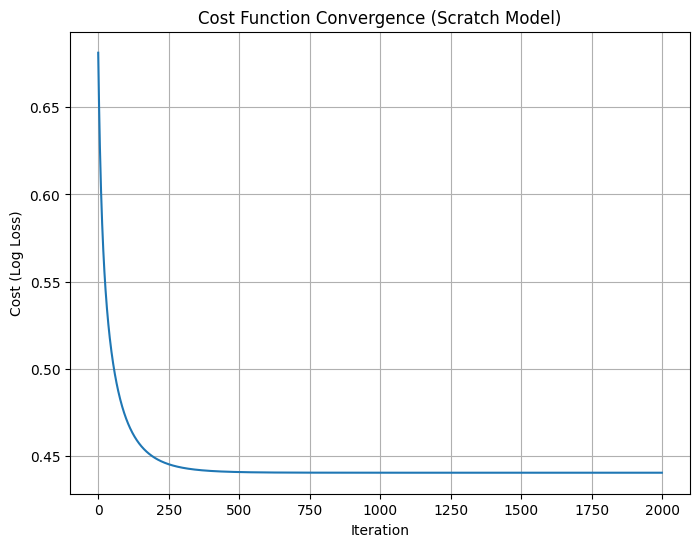

In [7]:
# For comparison or if initial data is not yet ready:
# from sklearn.model_selection import train_test_split

# ==================================================
# Assume df_train_processed and df_test_processed are the final DataFrames
# after all preprocessing related to missing values and outliers.
# TARGET_COL is also predefined.
# ==================================================
# Preprocessing code from the previous response to prepare X_train_prepared_df and X_test_prepared_df
# is repeated here to ensure inputs are ready.

print("\n--- Starting data preparation for Logistic Regression from scratch ---")

# Initial data assumption (replace with your actual data)
# This section should be replaced with your actual data
if 'df_train_processed' not in globals() or 'df_test_processed' not in globals():
    print("Warning: df_train_processed or df_test_processed not found. Using placeholder data.")
    data_train_sample = {
        'feature1': np.random.rand(100) * 10,
        'feature2': np.random.rand(100) * 5,
        'category1': np.random.choice(['A', 'B', 'C'], 100),
        'Survived': np.random.randint(0, 2, 100)
    }
    df_train_processed = pd.DataFrame(data_train_sample)
    data_test_sample = {
        'feature1': np.random.rand(50) * 10,
        'feature2': np.random.rand(50) * 5,
        'category1': np.random.choice(['A', 'B', 'C', 'D'], 50), # 'D' for handle_unknown
        'PassengerId': np.arange(1000, 1050) # for output
    }
    df_test_processed = pd.DataFrame(data_test_sample)
    TARGET_COL = 'Survived'


if TARGET_COL not in df_train_processed.columns:
    raise ValueError(f"Target column '{TARGET_COL}' not found in df_train_processed!")

X_train_orig = df_train_processed.drop(columns=[TARGET_COL])
y_train_orig = df_train_processed[TARGET_COL]
X_test_orig = df_test_processed.copy()

numerical_cols = X_train_orig.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train_orig.select_dtypes(exclude=np.number).columns.tolist()

numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

X_train_prepared_np = preprocessor.fit_transform(X_train_orig)
y_train_np = y_train_orig.to_numpy() # Convert y to a NumPy array

X_test_prepared_np = preprocessor.transform(X_test_orig)

print(f"Dimensions of X_train_prepared_np: {X_train_prepared_np.shape}")
print(f"Dimensions of y_train_np: {y_train_np.shape}")
print(f"Dimensions of X_test_prepared_np: {X_test_prepared_np.shape}")

# --- End of data preparation ---


class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000, add_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.add_intercept = add_intercept
        self.verbose = verbose
        self.weights = None # Includes bias if add_intercept=True
        self.cost_history = []

    def _add_intercept(self, X):
        # Add a column of ones for the bias
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def _sigmoid(self, z):
        # Sigmoid function
        # To prevent overflow in np.exp, we clip z values
        z_clipped = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z_clipped))

    def _cost_function(self, X, y, weights):
        # Cost function (Log Loss)
        m = X.shape[0] # Number of samples
        z = X @ weights # X.dot(weights)
        h = self._sigmoid(z)

        # Add a small value (epsilon) to prevent log(0)
        epsilon = 1e-15
        h = np.clip(h, epsilon, 1 - epsilon)

        cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost

    def fit(self, X, y):
        # X and y should be NumPy arrays
        if self.add_intercept:
            X_fit = self._add_intercept(X)
        else:
            X_fit = X

        n_samples, n_features = X_fit.shape
        self.weights = np.zeros(n_features) # Initialize weights with zeros
        self.cost_history = []

        if self.verbose:
            print(f"Initial weights: {self.weights}")

        # Gradient Descent
        for i in range(self.n_iterations):
            z = X_fit @ self.weights # X_fit.dot(self.weights)
            h = self._sigmoid(z)

            gradient = (1 / n_samples) * (X_fit.T @ (h - y)) # X_fit.T.dot(h - y)
            self.weights -= self.learning_rate * gradient

            cost = self._cost_function(X_fit, y, self.weights)
            self.cost_history.append(cost)

            if self.verbose and (i % (self.n_iterations // 10) == 0 or i == self.n_iterations - 1) :
                print(f"Iteration {i+1}/{self.n_iterations}, Cost: {cost:.4f}")

        if self.verbose:
            print(f"Final weights: {self.weights}")
            print(f"Final cost: {self.cost_history[-1]:.4f}")


    def predict_proba(self, X):
        if self.weights is None:
            raise ValueError("Model has not been trained yet. Call fit() first.")
        if self.add_intercept:
            X_predict = self._add_intercept(X)
        else:
            X_predict = X

        z = X_predict @ self.weights # X_predict.dot(self.weights)
        return self._sigmoid(z)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int) # Convert to 0 or 1


# --- Training and prediction with the scratch model ---
print("\n--- Training Logistic Regression model from scratch ---")

# X_train_prepared_np and y_train_np from the data preparation step are used
# y_train_np should be a column vector, or if 1D, handled correctly in the cost function.
# If y_train_np is 1D, y.reshape(-1, 1) is not necessary and y * np.log(h) works.
# If y_train_np is already 1D, no reshape is needed.

scratch_model = LogisticRegressionScratch(learning_rate=0.1, n_iterations=2000, verbose=True)
scratch_model.fit(X_train_prepared_np, y_train_np)

# --- Predicting on test data ---
print("\n--- Making predictions on test data with the scratch model ---")
# X_test_prepared_np from the data preparation step
test_predictions_scratch = scratch_model.predict(X_test_prepared_np)

print("Sample predictions from the scratch model:", test_predictions_scratch[:10])


# --- Create and save output CSV file with PassengerId starting from 892 ---

# Starting number for PassengerId
START_INDEX = 892

# Number of predictions (which should be equal to the number of rows in your test data)
num_predictions = len(test_predictions_scratch)

# Create values for the PassengerId column
passenger_ids = np.arange(START_INDEX, START_INDEX + num_predictions)

# Create output DataFrame
# First column PassengerId and second column predictions named TARGET_COL
output_df_kaggle_format = pd.DataFrame({
    'PassengerId': passenger_ids,
    TARGET_COL: test_predictions_scratch
})

# Output file name
output_file_name_kaggle = f'Saving_Titanic_Passengers_From_Disaster.csv'

# Save DataFrame.
# index=False: because PassengerId is written as a data column and we don't need the default Pandas index.
# header=True: writes the column names ('PassengerId', TARGET_COL) as the header.
output_df_kaggle_format.to_csv(output_file_name_kaggle, index=False, header=True)

print(f"\nOutput file (with PassengerId starting from {START_INDEX} and column '{TARGET_COL}') saved to '{output_file_name_kaggle}'.")
print(f"First few rows of the output file:")
print(output_df_kaggle_format.head())

# (Optional) Plot cost graph to check convergence
import matplotlib.pyplot as plt
if scratch_model.cost_history:
    plt.figure(figsize=(8,6))
    plt.plot(range(len(scratch_model.cost_history)), scratch_model.cost_history)
    plt.title("Cost Function Convergence (Scratch Model)")
    plt.xlabel("Iteration")
    plt.ylabel("Cost (Log Loss)")
    plt.grid(True)
    plt.show()